# 1. Data exploration, visualization and wrangling

1.1 Importing libraries and data

In [1]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print train.shape
print test.shape

(891, 12)
(418, 11)


The training data contains information of 891 Titanic passengers. There are 12 columns describing features of each passenger, of which one is whether the passenger survived the ship wreck. The testing data contains pretty much the same information except the survival of the passengers. This is the information we would like to predict in the end.

1.2 Data exploration and visualization

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


These are the feautures included in the data and their definitions.

- PassengerId: Unique identifier of each passenger
- Survived: Whether the passenger survivied (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Name: Name of the passenger, title of the passenger is also included
- Sex: male/female	
- Age: Age in years	
- SibSp: # of siblings / spouses aboard the Titanic	
- Parch: # of parents / children aboard the Titanic	
- Ticket: Ticket number	
- Fare: Fare amount
- Cabin: Cabin number	
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


With these features, we can start asking questions about what were the factors affecting the survival of passengers. For example,
1. Are children and elderly more likely to survive?
2. Are female more likely to survive than male?
3. Does social class (represented by Pclass, title extracted from name) affect survival?
4. Does social class affect the survival rate of different sex? Are women from the lower class more likely to survive than male from the upper class?
5. What about port of embarkation? Is it a proxy for social class or other demographic information such as age?
6. How does the number of family members on board affect survival? Does it make a difference if children are accompanied by their parents?

In [4]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Observations:
1. There are missing values in Age, Cabin and Embarked. Those will have to be filled in.
2. Cabin has a lot of missing values(77%!). In this case, dropping it might be a better option as it might be difficult to identify/compute appropriate figures that are representative enough to replace the missing values.
3. Some rows contain "0" value in Fare. It seems pretty unreasonable that a ticket to the Titanic would cost nothing. It can be considered as a missing value.
4. SibSp and Parch both provide information about the number of family members accompanying the passenger aboard. We can consider summing these 2 variables to create a new feature, family size.
5. PassengerId, Name and Ticket seemed to be unique identifiers that were irrelevant to a passenger's survival. However, title can be extracted from Name as a proxy of the socioeconomic status / marital status / sex of the passenger.
6. There are some categorical data which will need to be converted to dummy variables for mathematical analysis, such as Pclass and Embarked. 


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Observations:
1. Similar to the training data, the testing data has missing values in Age, Embarked and Fare. There are lots of missing values in Cabin as well. 

Data visualization is a crucial part of data analysis. It deepends our understanding of the data and helps us to identify which features are useful in predicting the survival of a passenger and determine how best to wrangle the data . For the former, it's important to note that differences between survival for different values of a feature/an independent variable is what will be used to separate the target variable (survival in this case) in the model. For example, if survival of different sexes, male and female, were different, it means that sex could be a relevant feature to predict whether a passenger had survived. Otherwise, if the survival of both sexes were about the same, then it would not be a good variable for our predictive model. 

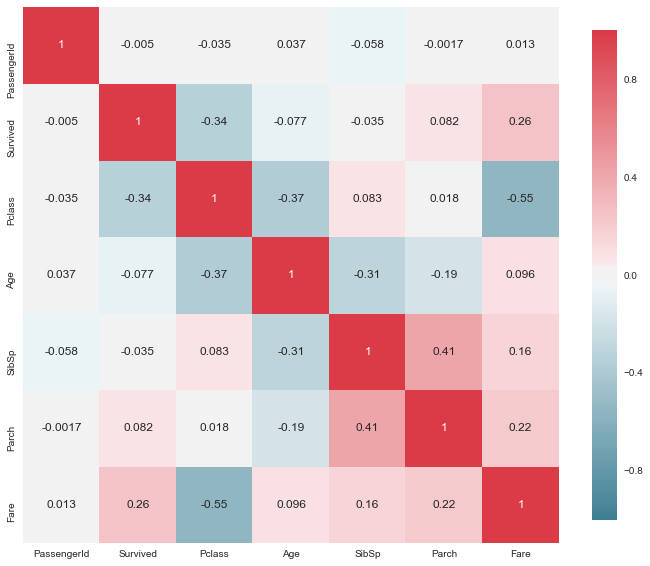

In [6]:
plt.subplots(figsize = (12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(
    train.corr(),
    cmap = cmap,
    square=True, 
    cbar_kws={'shrink': .9}, 
    annot = True, 
    annot_kws = {'fontsize': 12}
);

Heatmaps help us understand the correlation between features as well as their correlation with the target variable.
We observe that in absolute terms:
- Survival has some correlation with Pclass and Fare
- Pclass has some correlation with Age and Fare
- SipSp has some correlation with Parch, Age and Fare
- Parch has some correlation with Age, Fare

(I have defined "some correlation" as those with correlation >0.1 in absolute value)

Let's look at the features one by one. We'll look at the numerical features - Age, Fare, Parch and SibSp first, followed by the remaining categorical features.

(i) Age

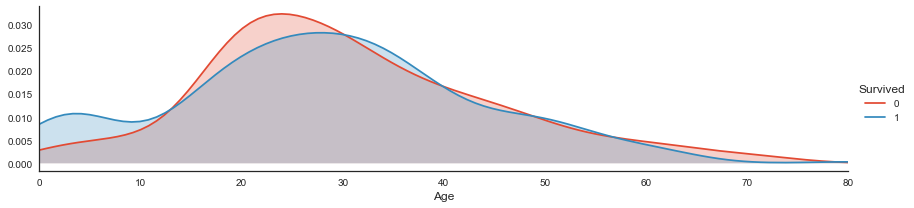

In [7]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot , 'Age' , shade= True )
facet.set(xlim=(0, train['Age'].max() ) )
facet.add_legend()
plt.show()

Hmm.. it looks like children are more likely to survive. What if we look into both age and sex?

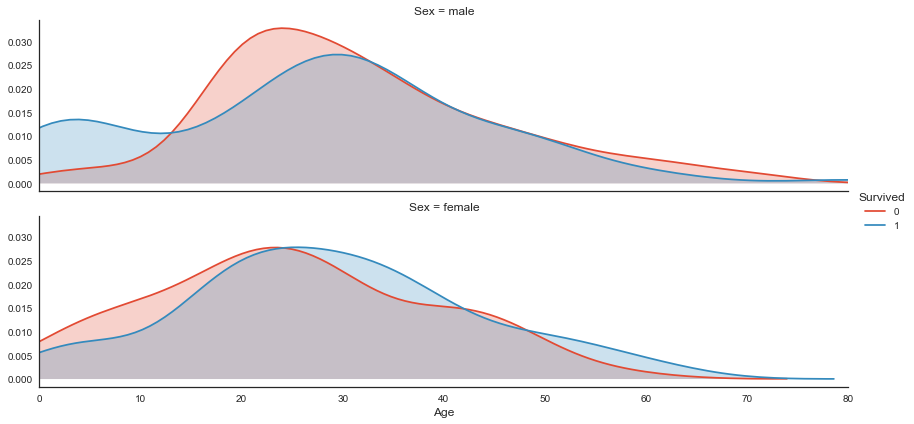

In [8]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4 , row = 'Sex')
facet.map(sns.kdeplot, 'Age', shade= True )
facet.set(xlim=(0, train['Age'].max() ) )
facet.add_legend()
plt.show()

Interesting, looks like boys are more likely to survive than men but the opposite goes for girls and women.

According to the heatmap, age has rather high correlation with Pclass, Parch and SipSp. Let's examine these features in pairs.

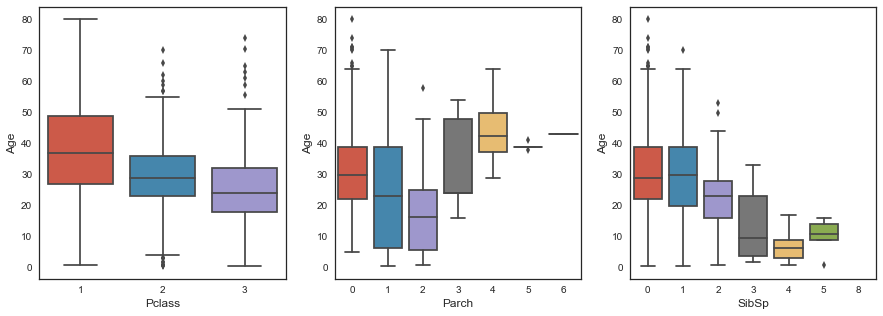

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [15,5])
sns.boxplot(x='Pclass', y='Age', ax=ax1, data=train)
sns.boxplot(x='Parch', y='Age', ax=ax2, data=train)
sns.boxplot(x='SibSp', y='Age', ax=ax3, data=train)

plt.show()

Observations:
1. Pclass: 1st class passengers were relatively older than 2nd class passengers, while 3rd class passengers were generally younger. This might be because older passengers had accumulated more wealth or achieved a higher social status than younger passengers.
2. Parch: Younger passengers travelled with 1-2 parent/child. It could be because younger passengers generally didn't have children and were travelling with their parents, while older passengers generally either travel alone (0) or with their children (and maybe their parents too!) so that they will have more parent/child on board.
3. SipSp: Younger passengers travelled with more sibling/spouse (>=3). It's probably because younger passengers generally travelled with their siblings, i.e. a larger group, while older passengers travelled with their spouse (one person) in general.


In the beginning of our analysis, we found that there are missing values for Age. We could try to use our observations to separate passengers into different groups according to their Sex, Pclass, Parch and SipSp and then impute their Age values depending on which group they belong to. There are 2 ways of imputing the Age value:
1. Calculate the mean Age of each group. Passengers with missing Age values will be assigned the mean Age of their repective groups.
2. Randomly choose the Age value of a passenger in a group and assign it to a passenger with missing Age value in the same gorup. 

The shortcoming of method #1 is that if a large number of passengers with missing Age value all belong to the same group, they will all be assigned the same Age. This could have huge effects to the distrubtion of Age. Therefore, let's use method #2. We will do this later in this blog post (Section 1.3 Data Wrangling).

(ii) Fare

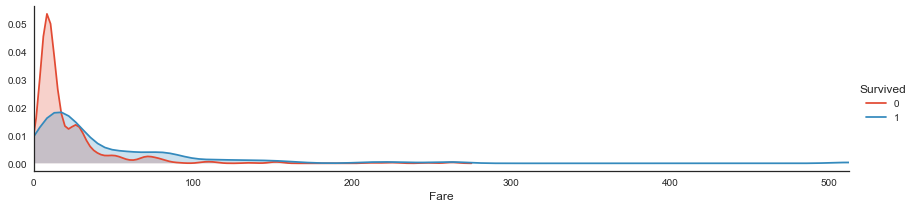

In [10]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot , 'Fare' , shade= True )
facet.set(xlim=(0, train['Fare'].max() ) )
facet.add_legend()
plt.show()

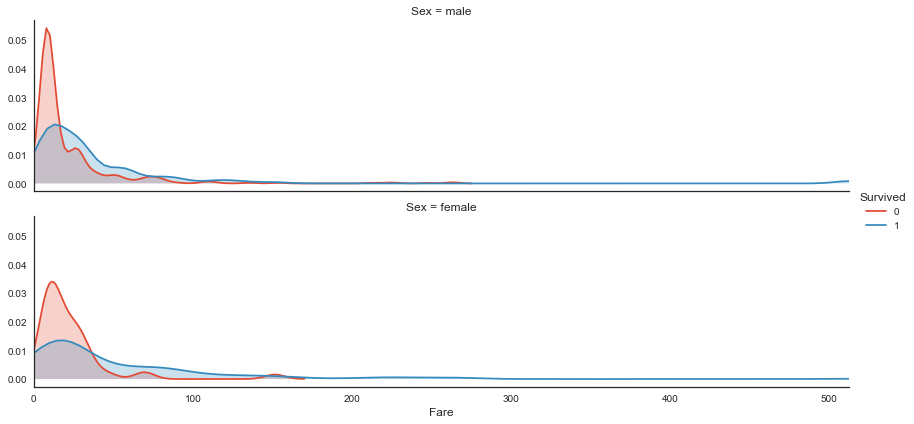

In [11]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4 , row = 'Sex')
facet.map(sns.kdeplot, 'Fare', shade= True )
facet.set(xlim=(0, train['Fare'].max() ) )
facet.add_legend()
plt.show()

We observe that passsengers who paid a higher Fare were more likely to survive, regardless of Sex.

Previously, we noticed that there are a few missing values for Fare (including 0 and null). In order to impute the missing values, let's try to observe the distribution of Fare across Pclass. Note that Fare and Pclass has a rather high correlation of -0.55 according to the heatmap.

Number of missing Fare values in training data: None
Number of missing Fare values in testing data: 1
Entries with Fare value = 0 in training & testing data: 17


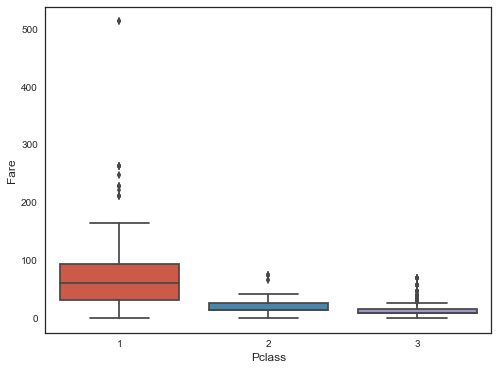

In [12]:
print "Number of missing Fare values in training data:", train['Fare'].isnull().value_counts().get(True)
print "Number of missing Fare values in testing data:", test['Fare'].isnull().value_counts().get(True)
print "Entries with Fare value = 0 in training & testing data:", np.sum(train['Fare'] == 0) + np.sum(test['Fare'] == 0)

ax = sns.boxplot(x='Pclass', y='Fare', data=train)


Since there aren't a lot of missing Fare values, we could replace them with the median Fare according to the passengers' Pclass. Note that median is chosen instead of mean due to outlier values observed, in particular, in Pclass  = 1.

(iii) Parch and SibSp

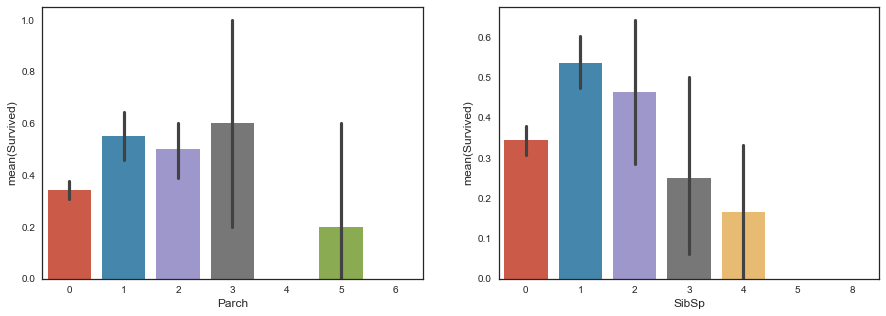

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
sns.barplot(x = 'Parch', y = 'Survived', ax = ax1, data = train)
sns.barplot(x = 'SibSp', y = 'Survived', ax = ax2, data = train)
plt.show()

It seems that passengers who travelled with a small group of family members (1-2 Parch or SibSp) were more likely to survive than those who travelled alone or with a large group. Let's group Parch and SibSp into FamilySize for further observation.

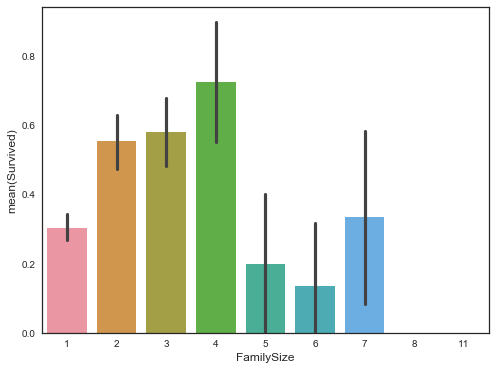

In [14]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1 # +1 to include the passenger himself/herself
ax = sns.barplot(x = 'FamilySize', y = 'Survived', data = train)

Again, it looks like smaller families of 2-4 were the most likely to survive. The new feature we just created, FamilySize, has some correlation with Age(-0.30) and Fare(0.22), similar to Parch and SibSp.

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


(iv) Pclass

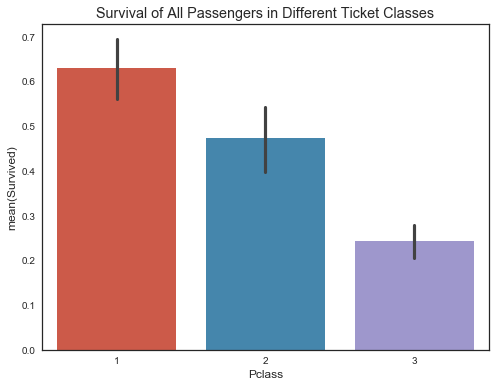

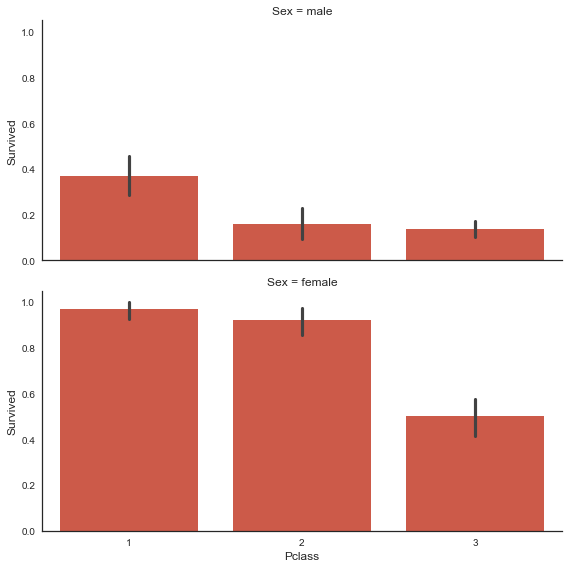

In [16]:
ax = sns.barplot(x = 'Pclass', y = 'Survived', data = train).set_title("Survival of All Passengers in Different Ticket Classes")
facet = sns.FacetGrid(train, aspect=2, size = 4, row = 'Sex')
facet.map(sns.barplot, 'Pclass', 'Survived')
plt.show()

1st class passengers were the most likely to survive, followed by those in the 2nd class then the 3rd  class. The same goes for both male and female.

(v) Sex

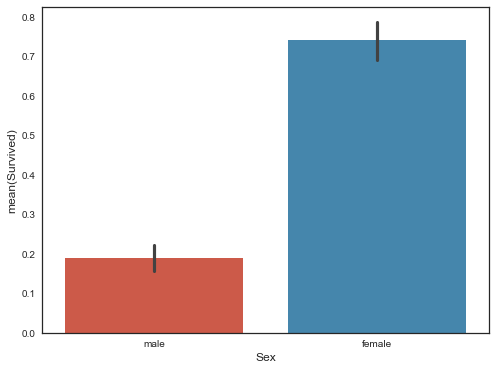

In [17]:
ax = sns.barplot(x = 'Sex', y = 'Survived', data = train)

Female were more likely to survive than male.

(vi) Embarked

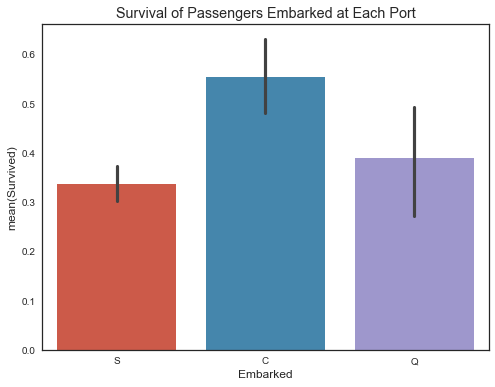

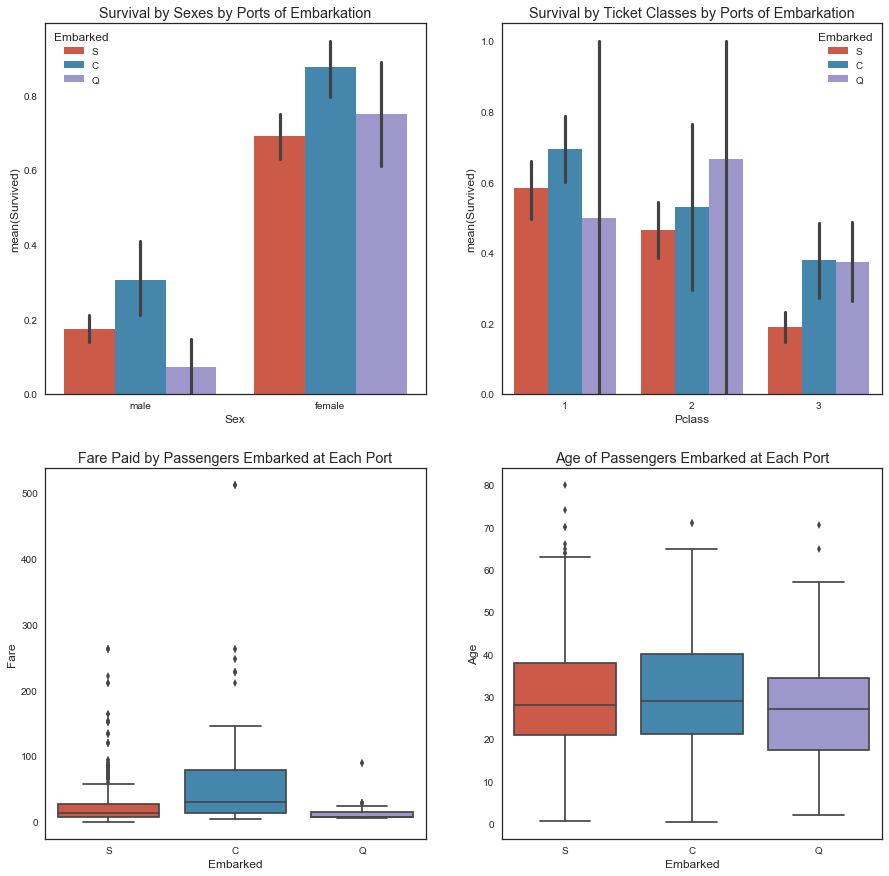

In [18]:
ax = sns.barplot(x = 'Embarked', y = 'Survived', data = train)
ax.set_title("Survival of Passengers Embarked at Each Port")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [15,15])
sns.barplot(x='Sex', y='Survived', hue = 'Embarked', ax=ax1, data=train).set_title("Survival by Sexes by Ports of Embarkation")
sns.barplot(x='Pclass', y='Survived', hue = 'Embarked', ax=ax2, data=train).set_title("Survival by Ticket Classes by Ports of Embarkation")
sns.boxplot(x='Embarked', y='Fare', ax=ax3, data=train).set_title("Fare Paid by Passengers Embarked at Each Port")
sns.boxplot(x='Embarked', y='Age', ax=ax4, data=train).set_title("Age of Passengers Embarked at Each Port")
plt.show()

Most passengers Embarked on Port C (Cherbourg). Port of Embarkation didn't seem to vary significantly for passengers of different Sex, Pclass, Fare or Age. Given that we only have a small number of missing values in Embarked (2 only), we will fill them in with the mode, Port C.

(vii) Name
While Name is a unique identifier that does not help to predict survival, title can be extracted from Name and might offer us some insights on how social rank/marital status correlates with survival.

In [19]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [20]:
# obtain unique Titles
train['Title'] = train['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [21]:
# Create a dictionary of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

train['Title'] = train['Title'].map(Title_Dictionary)

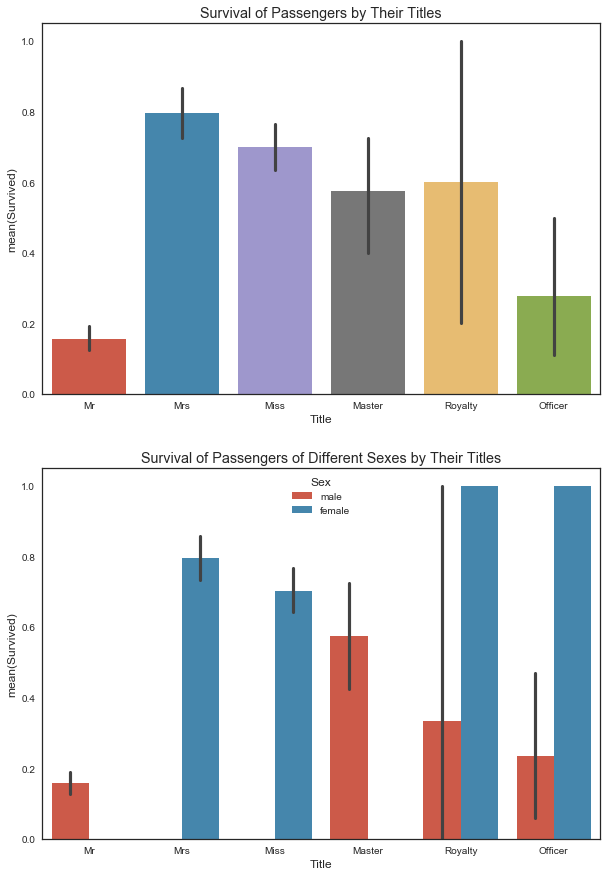

In [22]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize = [10,15])
sns.barplot(x = 'Title', y = 'Survived', ax = ax1, data = train).set_title("Survival of Passengers by Their Titles")
sns.barplot(x='Title', y='Survived', hue = 'Sex', ax = ax2, data=train).set_title("Survival of Passengers of Different Sexes by Their Titles")
plt.show()

Observations:
1. Married women (Mrs) were more likely to survive than single ladies (Miss).
2. Passengers with higher social status were more likely to survive, this was showed by how Master/Royalty/Officers were more likely to survive than peasants (Mr/Mrs/Miss) of the same sex.

1.3 Data Wrangling

Now that we have some idea on how the data should be cleaned up, let's combine the training and testing data into one dataframe to process them in one go.

In [23]:
# dropping the new columns we created to ease processing the full dataset
train = train.drop(['FamilySize', 'Title'], axis = 1)
full = train.append(test, ignore_index = True)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


1.3.1 Wrangling Numerical Data

(i) Age
We will impute the missing Age value of a passenger using the Age of a random passenger who belongs to the same Sex, Pclass, Parch and SibSp group.

In [24]:
# obtain the index of rows with missing Age values
index_missingage = full[full['Age'].isnull()].index.tolist()
print "There are %d missing Age values." % len(index_missingage)

There are 263 missing Age values.


In [25]:
for i in index_missingage:
    
    miss_passenger = full.iloc[i]
    
    # for each passenger with missing age value, find the group of passengers of the same Sex, Pclass, SibSp, Parch
    age_group = full[(full['Sex'] == miss_passenger['Sex']) & 
                     (full['Pclass'] == miss_passenger['Pclass']) &
                     (full['SibSp'] == miss_passenger['SibSp']) & 
                     (full['Parch'] == miss_passenger['Parch']) &
                     (full['Age'] > 0)] # Age > 0 to exclude those with missing Age values
    
    # in case there is no match, use a broader classification with only matching Sex and Pclass
    if len(age_group) == 0:
        age_group = full[(full['Sex'] == miss_passenger['Sex']) & 
                         (full['Pclass'] == miss_passenger['Pclass']) &
                         (full['Age'] > 0)]
    
    # Set the Age value of that index to be equal to that of a random sample in the same group
    full.loc[i, 'Age'] = age_group['Age'].sample(n=1).iloc[0]
    

# check if all missing values were imputed
full['Age'].isnull().value_counts()

False    1309
Name: Age, dtype: int64

(ii) Fare
We will impute missing Fare value of a passenger using the median Fare of the corresponding Pclass.

In [26]:
# mark fare = 0 as NA
full.loc[full['Fare'] == 0,'Fare'] = np.nan

index_missingfare = full[full['Fare'].isnull()].index.tolist()
print "There are %d missing Fare values." % len(index_missingfare)


There are 18 missing Fare values.


In [27]:
fare_guess = [0,0,0]
for i in range(0, 3):
    guess_df = full[(full['Pclass'] == i+1)]['Fare'].dropna()
    fare_guess[i] = int(guess_df.median())
   
print "The median fare for 1st, 2nd & 3rd class are: ", fare_guess

# assign the median fare of the respective ticket class of passengers with missing fare values
for x in index_missingfare:
    if full.loc[x, 'Pclass'] == 1:
        full.loc[x, 'Fare'] = fare_guess[0]
    elif full.loc[x, 'Pclass'] == 2:
        full.loc[x, 'Fare'] = fare_guess[1]
    else:
        full.loc[x, 'Fare'] = fare_guess[2]

# check to see if all missing Fare values were imputed
full['Fare'].isnull().value_counts()



The median fare for 1st, 2nd & 3rd class are:  [61, 15, 8]


False    1309
Name: Fare, dtype: int64

(iii) Parch & SibSp
We will try to create a new variable, FamilySize, by summing Parch and SipSp

In [28]:
full['FamilySize'] = full['Parch'] + full['SibSp'] + 1

1.3.2 Wrangling categorical data - conversion to dummy variables 

There are 2 ways to handle categorical data:
(a) Converting them into dummy variables
For example, there are 3 ports of embarkation, C = Cherbourg, Q = Queenstown and S = Southampton. When they are converted to dummy variables, 3 new columns are created, namely "Embarked_C", "Embarked_Q" and "Embarked_S". Passengers' ports of embarkation are represented as "0" (No) or "1" (Yes).

(b) Converting them into ordinal variables
If categorical data is converted into ordinal variables, each category is assigned a number according to a certain order. Using port of embarktion again as an example, let's say we assign "1" to Cherbourg, "2" to Queenstown and "3" to Southampton.

Converting categorical data into numerical variables is a better option in this case because there is no particular order among the ports of embarkation. While the difference won't be significant in this example given the small number of categories, for variables with a large number of categories, convering them into ordinal variables will implicitly assign orders to them (imagine if you have 10 categories, the last category will be assigned a value of 10). This could distort our analysis if the categories in fact does not have an ordinal relationship. To illustrate, imagine that in a linear regression, those which category is assigned a higher ordinal value will have more significant effect to the dependent variable. Assigning dummy variables (0, 1) minimizes this problem.

(i) Pclass

In [29]:
pclass = pd.get_dummies(full['Pclass'], prefix = 'Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


(ii) Sex

In [30]:
sex = pd.DataFrame()
sex_dict = {'male': 1, "female": 0}
sex['Sex'] = full['Sex'].map(sex_dict)
sex.head()

,Sex
0,1
1,0
2,0
3,0
4,1


(iii) Embarked
We will first replace the missing values with the mode, then convert Embarked to dummy variables.

In [31]:
embarked_raw = pd.DataFrame()
embarked_raw['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])
embarked_raw.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [32]:
embarked = pd.get_dummies(embarked_raw['Embarked'], prefix = 'Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


(iv) Name
We will first extract the Titles of passengers, then convert them to dummy variables.

In [33]:
title = pd.DataFrame()

# extract titles from names
title['Title'] = full['Name'].map(lambda name: name.split( ',' )[1].split( '.' )[0].strip())

# Create a dictionary of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

title['Title'] = title['Title'].map(Title_Dictionary)
title = pd.get_dummies(title['Title'])
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [34]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


Now to the last step - let's include the dummy variables we just creating in our dataset and remove the categorical variables as well as other features such as PassengerId and Cabin that we decided to not include in our model.

In [35]:
full_numeric = full.drop(['Cabin', 'Embarked', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket'], axis = 1)

full_dummies = pd.concat([full_numeric, pclass, sex, embarked, title], axis = 1)
full_dummies.head()

,Age,Fare,Parch,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,0.0,2,0,0,1,1,0,0,1,0,0,1,0,0,0
1,38.0,71.2833,0,1,1.0,2,1,0,0,0,1,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1.0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
3,35.0,53.1000,0,1,1.0,2,1,0,0,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,0,0,0.0,1,0,0,1,1,0,0,1,0,0,1,0,0,0


# 2. Modelling the data and tuning model hyperparameters
## 2.1 Importing libraries

In [36]:
from sklearn.model_selection import ShuffleSplit, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## 2.2 Preparing data
In the previous section, we have combined the training and testing data for data wrangling. Now, let's split them back into training and testing set. Our model will be fit into the training data.

In [37]:
# only the features will be included as "X", while Survived, the target variable, will be "Y"
full_X = full_dummies.drop('Survived', axis = 1)
full_Y = full_dummies[['Survived']]

train_valid_X = full_X[0:891]
train_valid_Y = full_Y[0:891]

test_X = full_X[891:]

To avoid overfitting, we will further split the training data into training and validation set. The model will first be trained based on the training set and then applied and evaluated on the validation set. Since the model was not trained on the validation set, if it is still able to predict the target ("Survived") on the "unseen" validation set on similar level of accuracy as with the training set, we can be fairly confident that the model generalizes pretty well. Otherwise, the model might be overfitted - it generalizes poorly and is only useful specifically on the training set. 

We will use shuffle split, one of the many cross validation techniques, to split the training data into training and validation (or called testing) set to train the model. 

Scikit-learn allows us to specify the number of reshuffling and splitting iterations and size of the training and validation set. I will reshuffle and split the training data 10 times (n_splits=10), in which each time 60% of the data will be used as the training set while 30% of the data will be used as the validation (testing) set. The remaining 10% is intentionally left out to allow more randomness in our sampling.

In [38]:
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

## 2.3 Modelling the data

In this blog post, I'll use the Decision Tree Classifier because its easy to interpret and provides information on the key classification features. Before we jump in to start training our data, allow me to briefly explain what a Decision Tree Classifier is.

A Decision Tree Classifier identifies the most effective feature that classifies the data into 2 subsets based on a certain criteria. The default criteria used in Scikit-learn is to minimize Gini impurity. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. For example, if everything in the subset is "A", then the Gini impurity will be 0 because whenever we pick a random element from the subset, we would never make a wrong guess because we know that we would have always picked an "A". On the other hand, if there are 3 "A"s and 3 "B"s in the subset, the Gini impurity would be 0.5 because we would make the wrong guess half of the time. Since the goal of the Decision Tree Classifier is to minimize Gini impurity, it will select a feature which is able to identify subsets that contain as many elements from the same class as possible. That way, the chance of making a wrong guess of the label of a randomly chosen element from the subsets is minimized.

Here is a visualized example of how a decision tree classifies 3 different Iris flower species, setosa, versicolor and virginica, refer to the image here - http://scikit-learn.org/stable/modules/tree.html

1. The decision tree identifies a feature - whether the length of the petal of an Iris flower is shorter than 2.45cm - that separates the data into 2 subsets while minimizing the gini impurity.
2. According to the orange box, all Iris flowers with petals shorter than 2.45cm are Iris setosas. Since all flowers in this group are of the same species, gini impurity is 0. Whereas for the white box, 50% of them are Iris versicolors while the remaining 50% are Iris virginicas therefore gini impurity is 0.5 as there is 50% chance of making a wrong guess by, for example, guessing any random sample from this subset is a Iris versicolor.
3. The decision tree identifies a feature to further seperate the subset in the white box - whther the width of the petal of an Iris flower is less than 1.75cm. Referring to the green box, out of all 54 flowers with petal width less than 1.75cm, most of them (49) are Iris versicolors whereas in the purple box, 45 out of 46 flowers with petal width more than 1.75cm are Iris virginicas. 

Up to this level we could make a pretty accurate guess of which species an Iris flower belongs to by looking at its petal length and width. We can stop here at the decision tree if we think this level of accuracy is good enough or we can go further down the decision tree to identify more features to further seperate our datasets. 

After gaining some basic understanding of a Decision Tree Classifier, let's train our model using default hyperparameters in Scikit-learn and shuffle split for cross validation. Then, its hyperparameters will be tuned to see if it improves the model score.

In [39]:
dtree = DecisionTreeClassifier(random_state = 0)

base_results = cross_validate(dtree, train_valid_X, train_valid_Y, cv  = cv_split)
dtree.fit(train_valid_X, train_valid_Y)

print "Decision tree parameters (default): ", dtree.get_params()
print "-"*10
print "Decision tree mean training score (default): {:.2f}". format(base_results['train_score'].mean()*100) 
print "Decision tree mean validation score (default): {:.2f}". format(base_results['test_score'].mean()*100)

Decision tree parameters (default):  {'presort': False, 'splitter': 'best', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'min_impurity_split': None, 'max_features': None, 'max_depth': None, 'class_weight': None}
----------
Decision tree mean training score (default): 99.16
Decision tree mean validation score (default): 76.34


# 2.4 Tuning model hyperparameters
It seems that our model is doing pretty well given the high model scores for both the training and validation set. However, note that there is a rather big difference between the scores of the traning and validation set. Could this be overfitting? Let's try to tune the hyperparameters of our Decision Tree Classifier to see if we can improve our model's performance and minimize overfitting. 

Param_grid is used to specify the combinations of hyperparameters we would like to try on the decision tree. Then, GridSearchCV will be used to identify the combination of hyperparameters that has the best performance based on a specified criteria. We will specify our parameter grid to try 12 different combinations of hyperparameters, e.g. criterion: gini & max_depth: 2, criterion: gini & max_depth: 4 and so on.

Criterion, as explained previously, is the "goal" we want the decision tree to achieve when separating our data into subsets. In addition to minimizing gini impurity, we would like to try another criteria - to minimize entropy. To minimize entropy basically means to minimize to "messiness" within a subset of your data, i.e. to try to separate your data into subsets of which elements within a subset are as homegenous to each other as possible. Similar concept to gini impurity but the math behind is different, here's a website if you would like to learn more: https://github.com/rasbt/python-machine-learning-book/blob/master/faq/decision-tree-binary.md

Max_depth means how many "layers" your decision tree will have at most. The depth of the Iris flower decision tree is 5. 

A scoring mechanism, "roc_auc", is specified. The combination of hyperparameters that has the highest ROC AUC score will be chosen as the "best" model. ROC AUC stands for Area Under the Receiver Operating Characteristic Curve. The ROC Curve visualizes the true postitive and false positive rate of our classifier. If they are below the diagonal line (area under the curve <0.5), our classifier is worse than a random guess. On the other hand, a perfect classifier will be at the top left corner (area under the curve = 1) as all the "positives" are flagged correctly and none of the "negatives" are incorrectly flagged as "positives". The uppper right corner means our classifier is flagging everything (all positives) and the lower left corner means our classifier is flagging nothing (all negatives).

Let's see which are the best hyperparameters for our decision tree. 

In [62]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [2,4,6,8,10,None],'random_state': [0]}
tune_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, refit = True)
tune_model.fit(train_valid_X, train_valid_Y)

print "Decision tree parameters (tuned): ", tune_model.best_params_
print "Decision tree roc_auc score (tuned): ", tune_model.best_score_
print "Decision tree mean training score (tuned): {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100) 
print "Decision tree mean validation score (tuned): {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100)

Decision tree parameters (tuned):  {'random_state': 0, 'criterion': 'entropy', 'max_depth': 4}
Decision tree roc_auc score (tuned):  0.848960029904
Decision tree mean training score (tuned): 90.01
Decision tree mean validation score (tuned): 84.90


In [65]:
best_tree = DecisionTreeClassifier(**tune_model.best_params_)
best_tree.fit(train_valid_X, train_valid_Y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

The best model for our training data is one that minimizes entropy with a max_depth of 4. Its ROC AUC score is >0.5, so it is better than a random guess. Compared to the training and validation score of the default decision tree (99 and 76), the tuned model has a higher validation score and lower different between the training and validaiton score (less overfitting). 

# 3. Implementation
Aside from the Decision Tree Classifier, we can try other classification models and choose one that produces the most accurate prediction to submit to Kaggle. Or, we can use the ensemble method, in which the "joint effort" of several models are used for prediction. In this blog post, I'll use hard voting among 7 models - the final prediction will be made according to the majority result, in other words, if most models predict that a particular passenger survived, the final prediction will be "survived" = 1.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [43]:
# list of models to use
vote_est = [
    ('dtc', DecisionTreeClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('rfc', RandomForestClassifier()),
    ('lr', LogisticRegression()), 
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True))
]


# use voting classifier and shuffle split for cross validation
vote_hard = VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, train_valid_X, train_valid_Y, cv  = cv_split)
vote_hard.fit(train_valid_X, train_valid_Y)

# scores of the ensemble
print("Ensemble mean training score: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Ensemble mean validation score: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))


C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble mean training score: 92.92
Ensemble mean validation score: 82.95


In [67]:
prediction = vote_hard.predict(test_X).astype(int)

test_results = pd.DataFrame()
test_results['PassengerId'] = test_X.index + 1
test_results['Survived'] = prediction
test_results.set_index('PassengerId', inplace=True)

test_results.head()
test_results.to_csv('titanic_submission.csv')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


While there is a slight improvement in training score, the validation score of the ensemble is actually lower than that of the tuned Decision Tree Classifier. Bare in mind that the ensemble uses default settings of the models. We can tune the hyper parameters of each of the models in the ensemble to further improve the performance.